In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [11]:
df = pd.read_csv('PCOS_data.csv')
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Pain,Voice Change
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,0,110,80,3,3,18.0,18.0,8.5,No,No
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0,120,70,3,5,15.0,14.0,3.7,No,No
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,0,120,80,13,15,18.0,20.0,10.0,No,Yes
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0,120,70,2,2,15.0,14.0,7.5,Yes,No
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0,120,80,3,4,16.0,14.0,7.0,No,No


In [12]:
df.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Pain', 'Voice Change'],
      dtype='object')

The endometrium is not responsible for causing PCOS, so dropping it. Also, as per scientific research high and low blood nothing to do with PCOS.

In [13]:
df1 = df.loc[:,['PCOS (Y/N)', ' Age (yrs)','Weight (Kg)', 'Height(Cm) ','BMI', 'Weight gain(Y/N)', 
                'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Pain', 'Voice Change']]
df1

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),Pain,Voice Change
0,0,28,44.6,152.000,19.3,0,0,0,0,1.0,0,No,No
1,0,36,65.0,161.500,24.9,0,0,0,0,0.0,0,No,No
2,1,33,68.8,165.000,25.3,0,0,0,1,1.0,0,No,Yes
3,0,37,65.0,148.000,29.7,0,0,0,0,0.0,0,Yes,No
4,0,25,52.0,161.000,20.1,0,0,0,0,0.0,0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,35,50.0,164.592,18.5,0,0,0,0,0.0,0,No,No
537,0,30,63.2,158.000,25.3,1,0,0,0,0.0,0,No,No
538,0,36,54.0,152.000,23.4,0,0,0,0,0.0,0,No,No
539,0,27,50.0,150.000,22.2,0,0,0,1,0.0,0,No,No


In [14]:
from sdv.tabular import GaussianCopula
model = GaussianCopula()
model.fit(df1)

In [15]:
sample = model.sample(1000)
df = pd.concat([df1,sample],ignore_index = True)
df

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),Pain,Voice Change
0,0,28,44.6,152.000,19.3,0,0,0,0,1.0,0,No,No
1,0,36,65.0,161.500,24.9,0,0,0,0,0.0,0,No,No
2,1,33,68.8,165.000,25.3,0,0,0,1,1.0,0,No,Yes
3,0,37,65.0,148.000,29.7,0,0,0,0,0.0,0,Yes,No
4,0,25,52.0,161.000,20.1,0,0,0,0,0.0,0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,1,22,58.6,153.857,25.1,1,1,1,0,1.0,1,Yes,Yes
1537,0,35,64.7,153.668,27.3,0,0,0,0,1.0,0,No,No
1538,1,32,49.8,151.599,21.8,1,1,1,1,1.0,1,Yes,Yes
1539,0,22,52.7,150.942,23.5,0,1,0,0,1.0,0,No,No


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541 entries, 0 to 1540
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PCOS (Y/N)            1541 non-null   int64  
 1    Age (yrs)            1541 non-null   int64  
 2   Weight (Kg)           1541 non-null   float64
 3   Height(Cm)            1541 non-null   float64
 4   BMI                   1541 non-null   float64
 5   Weight gain(Y/N)      1541 non-null   int64  
 6   hair growth(Y/N)      1541 non-null   int64  
 7   Skin darkening (Y/N)  1541 non-null   int64  
 8   Pimples(Y/N)          1541 non-null   int64  
 9   Fast food (Y/N)       1540 non-null   float64
 10  Reg.Exercise(Y/N)     1541 non-null   int64  
 11  Pain                  1541 non-null   object 
 12  Voice Change          1541 non-null   object 
dtypes: float64(4), int64(7), object(2)
memory usage: 156.6+ KB


In [17]:
df.isnull().sum()

PCOS (Y/N)              0
 Age (yrs)              0
Weight (Kg)             0
Height(Cm)              0
BMI                     0
Weight gain(Y/N)        0
hair growth(Y/N)        0
Skin darkening (Y/N)    0
Pimples(Y/N)            0
Fast food (Y/N)         1
Reg.Exercise(Y/N)       0
Pain                    0
Voice Change            0
dtype: int64

In [18]:
df['Fast food (Y/N)'].unique()

array([ 1.,  0., nan])

In [19]:
df['Fast food (Y/N)'].fillna(0,inplace = True)

In [20]:
features = df.columns
for feature in features:
    print('*'*80)
    print('{} : {}'.format(feature,df[feature].unique()))

********************************************************************************
PCOS (Y/N) : [0 1]
********************************************************************************
 Age (yrs) : [28 36 33 37 25 34 32 20 26 38 29 31 30 41 24 27 23 35 39 40 22 44 21 42
 43 45 47 48 46]
********************************************************************************
Weight (Kg) : [ 44.6  65.   68.8  52.   74.1  64.   58.5  40.   71.   49.   74.   50.
  57.3  80.5  43.   69.2  52.4  85.   64.2  63.   42.   76.   68.   62.
  56.   57.   58.   54.   73.   72.   53.   78.   33.   59.   75.   51.
  67.   60.   55.   61.   70.   48.  108.   57.6  43.7  61.6  69.5  74.4
  45.   83.5  62.5  67.5  91.4  61.7  62.2  64.3  68.6  80.   71.2  83.
  79.   89.   53.4  69.   56.4  49.3  53.2  60.8  46.   72.3  59.6  73.5
  88.   66.   66.3  47.   47.8  76.8  31.   74.3  58.1  53.6 104.   63.8
  62.7  32.   35.   34.   53.5  64.4  58.9  55.1  55.7  65.7  36.   55.5
  82.   80.4  77.9  60.5  76.9  65.6  38.

In [35]:
df['Pain'] = df['Pain'].replace('YEes', 'Yes')

In [36]:
df.describe()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),OverWeight
count,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.00000,1541.000000,1541.000000,1541.000000,1541.000000
mean,0.412719,31.421155,59.900779,156.611086,24.384231,0.434134,0.353018,0.38157,0.506814,0.521739,0.326411,0.428942
std,0.492483,5.477087,10.786710,5.988584,3.984332,0.495804,0.478063,0.48593,0.500116,0.499689,0.469052,0.495086
min,0.000000,20.000000,31.000000,137.000000,12.400000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,27.000000,52.600000,152.136000,21.800000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,31.000000,60.000000,156.476000,24.300000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,35.000000,67.000000,160.755000,27.100000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
max,1.000000,48.000000,108.000000,180.000000,38.900000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


C:\Users\satguru\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution')

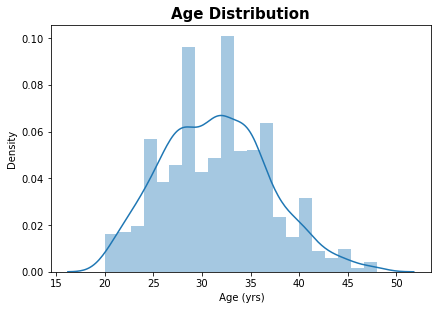

In [37]:
fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((2,2),(0,0))
sns.distplot(df[' Age (yrs)'])
plt.title('Age Distribution', fontsize=15, weight='bold')

In [38]:
#since we have bmi, we don't need weight and height. we will find if the person is overweight or not 
df['OverWeight'] = df['BMI'].apply(lambda x: 1 if x>25.0 else 0)
df

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),Pain,Voice Change,OverWeight
0,0,28,44.6,152.000,19.3,0,0,0,0,1.0,0,No,No,0
1,0,36,65.0,161.500,24.9,0,0,0,0,0.0,0,No,No,0
2,1,33,68.8,165.000,25.3,0,0,0,1,1.0,0,No,Yes,1
3,0,37,65.0,148.000,29.7,0,0,0,0,0.0,0,Yes,No,1
4,0,25,52.0,161.000,20.1,0,0,0,0,0.0,0,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,1,22,58.6,153.857,25.1,1,1,1,0,1.0,1,Yes,Yes,1
1537,0,35,64.7,153.668,27.3,0,0,0,0,1.0,0,No,No,1
1538,1,32,49.8,151.599,21.8,1,1,1,1,1.0,1,Yes,Yes,0
1539,0,22,52.7,150.942,23.5,0,1,0,0,1.0,0,No,No,0


In [52]:
df['Pain'] = df['Pain'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Voice Change'] = df['Voice Change'].apply(lambda x: 1 if x == 'Yes' else 0)

In [53]:
df2 = df.drop(['Weight (Kg)', 'Height(Cm) ', 'BMI'],axis = 1)
df2

,PCOS (Y/N),Age (yrs),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),Pain,Voice Change,OverWeight
0,0,28,0,0,0,0,1.0,0,0,0,0
1,0,36,0,0,0,0,0.0,0,0,0,0
2,1,33,0,0,0,1,1.0,0,0,1,1
3,0,37,0,0,0,0,0.0,0,1,0,1
4,0,25,0,0,0,0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1536,1,22,1,1,1,0,1.0,1,1,1,1
1537,0,35,0,0,0,0,1.0,0,0,0,1
1538,1,32,1,1,1,1,1.0,1,1,1,0
1539,0,22,0,1,0,0,1.0,0,0,0,0


In [54]:
categorical_features = []
for feature in df2.columns:
    if len(df2[feature].unique())==2:
        categorical_features.append(feature)
categorical_features.remove('PCOS (Y/N)')
categorical_features

['Weight gain(Y/N)',
 'hair growth(Y/N)',
 'Skin darkening (Y/N)',
 'Pimples(Y/N)',
 'Fast food (Y/N)',
 'Reg.Exercise(Y/N)',
 'Pain',
 'Voice Change',
 'OverWeight']

<AxesSubplot:xlabel='PCOS (Y/N)', ylabel='Weight gain(Y/N)'>

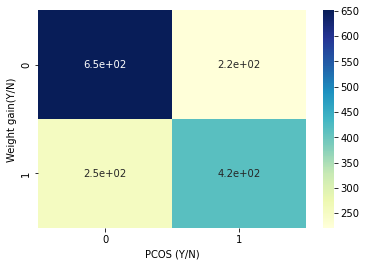

In [41]:
sns.heatmap(df2.groupby(['Weight gain(Y/N)', 'PCOS (Y/N)']).size().unstack(), cmap='YlGnBu',annot = True)

<AxesSubplot:xlabel='PCOS (Y/N)', ylabel='hair growth(Y/N)'>

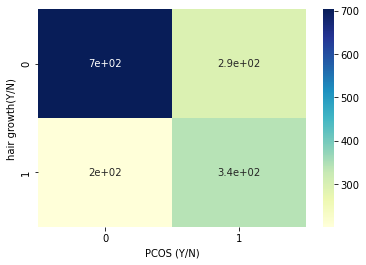

In [42]:
sns.heatmap(df2.groupby(['hair growth(Y/N)', 'PCOS (Y/N)']).size().unstack(), cmap='YlGnBu',annot = True)

<AxesSubplot:xlabel='PCOS (Y/N)', ylabel='Pimples(Y/N)'>

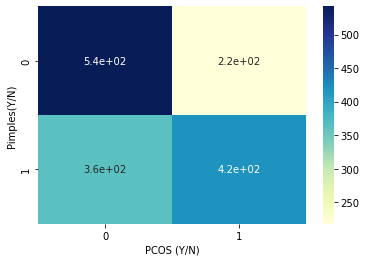

In [43]:
sns.heatmap(df2.groupby(['Pimples(Y/N)', 'PCOS (Y/N)']).size().unstack(), cmap='YlGnBu',annot = True)

<AxesSubplot:xlabel='PCOS (Y/N)', ylabel='Skin darkening (Y/N)'>

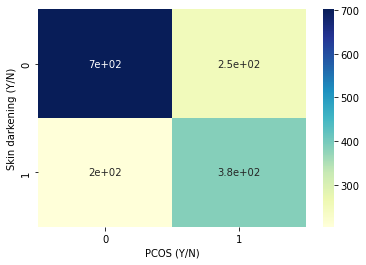

In [44]:
sns.heatmap(df2.groupby(['Skin darkening (Y/N)', 'PCOS (Y/N)']).size().unstack(), cmap='YlGnBu',annot = True)

<AxesSubplot:xlabel='PCOS (Y/N)', ylabel='Fast food (Y/N)'>

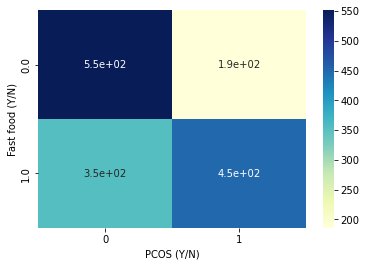

In [45]:
sns.heatmap(df2.groupby(['Fast food (Y/N)', 'PCOS (Y/N)']).size().unstack(), cmap='YlGnBu',annot = True)

<AxesSubplot:xlabel='PCOS (Y/N)', ylabel='Reg.Exercise(Y/N)'>

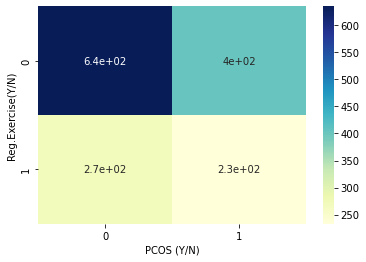

In [46]:
sns.heatmap(df2.groupby(['Reg.Exercise(Y/N)', 'PCOS (Y/N)']).size().unstack(), cmap='YlGnBu',annot = True)

<AxesSubplot:xlabel='PCOS (Y/N)', ylabel='OverWeight'>

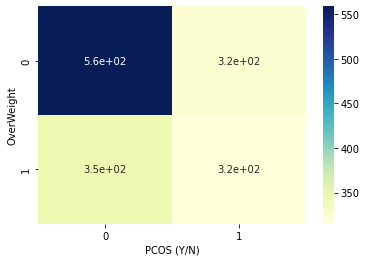

In [47]:
sns.heatmap(df2.groupby(['OverWeight', 'PCOS (Y/N)']).size().unstack(), cmap='YlGnBu',annot = True)

<AxesSubplot:xlabel='PCOS (Y/N)', ylabel='Pain'>

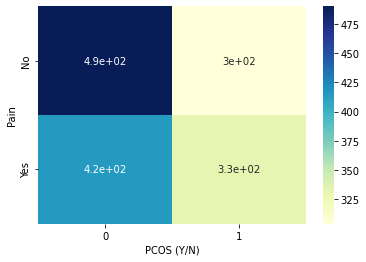

In [48]:
sns.heatmap(df2.groupby(['Pain', 'PCOS (Y/N)']).size().unstack(), cmap='YlGnBu',annot = True)

<AxesSubplot:xlabel='PCOS (Y/N)', ylabel='Voice Change'>

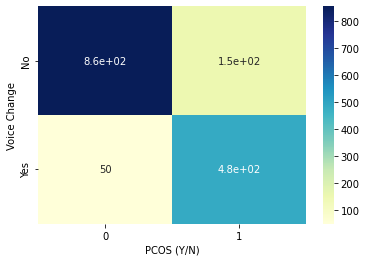

In [49]:
sns.heatmap(df2.groupby(['Voice Change', 'PCOS (Y/N)']).size().unstack(), cmap='YlGnBu',annot = True)

In [55]:
X = df2.drop(['PCOS (Y/N)'],axis = 1)

y = df2['PCOS (Y/N)']


In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
model.score(x_test,y_test)

0.8673139158576052

In [57]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 10, test_size = 0.2,random_state = 0)
cross_val_score(LogisticRegression(),X,y,cv = cv)

array([0.86084142, 0.84789644, 0.88673139, 0.87702265, 0.87378641,
       0.87702265, 0.85113269, 0.87055016, 0.88349515, 0.89320388])

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [59]:
dtree_scores = []
for i in range(1,len(X.columns)+1):
    dtree_classifier = DecisionTreeClassifier(max_features = i,random_state = 0)
    dtree_classifier.fit(x_train,y_train)
    dtree_scores.append(dtree_classifier.score(x_test,y_test))
dtree_scores

[0.7702265372168284,
 0.8511326860841424,
 0.8511326860841424,
 0.8187702265372169,
 0.8122977346278317,
 0.7993527508090615,
 0.8187702265372169,
 0.7961165048543689,
 0.7993527508090615,
 0.7961165048543689]

In [60]:
rf_scores = []
estimators = [10,100,200,500,1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(x_train, y_train)
    rf_scores.append(rf_classifier.score(x_test, y_test))
rf_scores

[0.8543689320388349,
 0.8543689320388349,
 0.8543689320388349,
 0.86084142394822,
 0.8511326860841424]

In [61]:
from sklearn.model_selection import GridSearchCV

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'logistic' : {
            'model': LogisticRegression(),
            'params': {'C': [0.01, 0.1, 1, 10],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga'],
              'max_iter': [100, 200, 300],
              'tol': [0.0001, 0.001, 0.01]
                      }
    },
        'random_forest': {
            'model': RandomForestClassifier(),
            'params':{'n_estimators': [50, 100, 200, 500],
            'max_depth': [5, 10, 15, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False]}
        },
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params':{'max_depth': [2, 4, 6, 8, 10],
              'min_samples_split': [2, 4, 6, 8],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_features': ['sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}
    
}
            }     
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\satguru\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\satguru\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\satguru\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\satguru\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\satguru\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\satguru\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: T

C:\Users\satguru\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\satguru\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\satguru\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\satguru\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\satguru\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\satguru\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: T

KeyboardInterrupt: 

In [63]:
from sklearn.model_selection import RandomizedSearchCV
def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'logistic' : {
            'model': LogisticRegression(),
            'params': {'C': [0.01, 0.1, 1, 10],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga'],
              'max_iter': [100, 200, 300],
              'tol': [0.0001, 0.001, 0.01]}
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  RandomizedSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,logistic,0.873786,"{'tol': 0.01, 'solver': 'liblinear', 'penalty'..."


In [44]:
from sklearn.model_selection import RandomizedSearchCV
def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'random_forest': {
            'model': RandomForestClassifier(),
            'params':{'n_estimators': [50, 100, 200, 500],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]}
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  RandomizedSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

KeyboardInterrupt: 

In [43]:
from sklearn.model_selection import RandomizedSearchCV
def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'dt': {
            'model': DecisionTreeClassifier(),
            'params':{'max_depth': [2, 4, 6, 8, 10],
              'min_samples_split': [2, 4, 6, 8],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_features': ['sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  RandomizedSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,dt,0.734628,"{'min_samples_split': 6, 'min_samples_leaf': 3..."


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
param_grid = {'n_neighbors': range(1, 11),
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan', 'minkowski']}

In [ ]:
from sklearn.metrics import f1_score
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1')

In [ ]:
grid_search.fit(X, y)

In [ ]:
def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'knn': {
            'model': KNeighborsClassifier(),
            'params':{'n_neighbors': range(1, 11),
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan', 'minkowski']}
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  RandomizedSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# Define a function that returns the model
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create a KerasClassifier object
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameters to search over
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [50, 100, 150],
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'sigmoid']
}

# Perform random search
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=3, n_iter=10)
grid_result = grid.fit(X, y)

# Print the best parameters and score
print("Best parameters: ", grid_result.best_params_)
print("Best score: ", grid_result.best_score_)


C:\Users\satguru\AppData\Local\Temp\ipykernel_20736\269507992.py:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


ValueError: activation is not a legal parameter